# WE11-Autoencoder

## Assignment Submitted by Aravind Dudam

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

In [2]:
from tensorflow import keras
pretrained_model = keras.models.load_model('C:/Users/aravinddudam/Downloads/Data Science/initially_trained_autoencoder.h5')

## Load and Normalize the Data

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


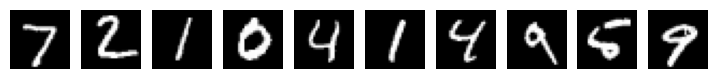

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Evaluating the autoencoder model by reconstructing the test images and visually inspecting the results

313/313 [==============================] - 1s 2ms/step


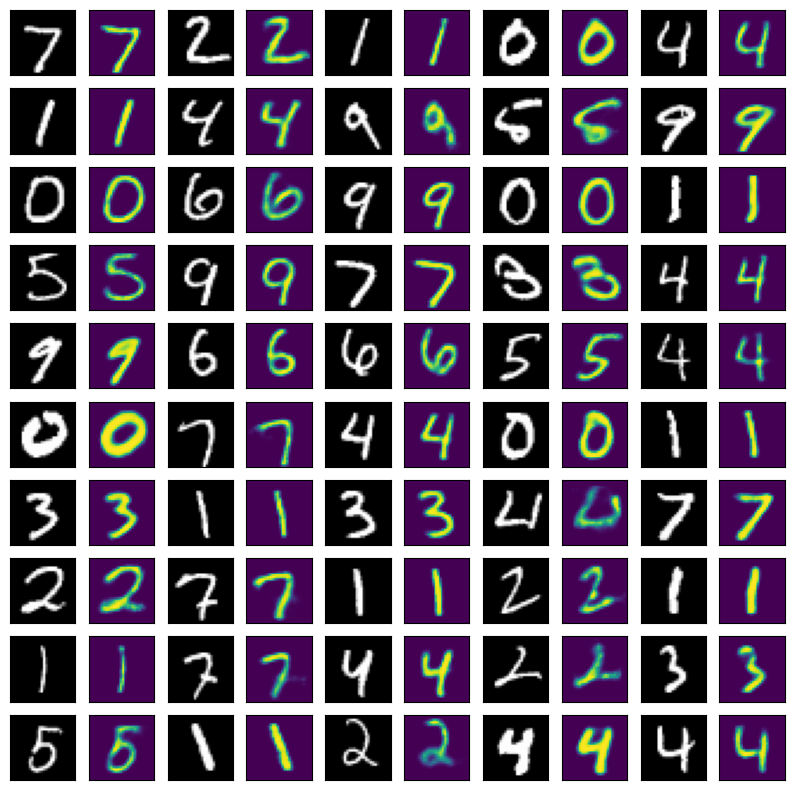

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [6]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

image1 = tf.keras.utils.load_img('C:/Users/aravinddudam/Downloads/Data Science/A1.png', target_size=(28, 28), color_mode='grayscale')
image2 = tf.keras.utils.load_img('C:/Users/aravinddudam/Downloads/Data Science/A2.png', target_size=(28, 28), color_mode='grayscale')
image3 = tf.keras.utils.load_img('C:/Users/aravinddudam/Downloads/Data Science/A3.png', target_size=(28, 28), color_mode='grayscale')
image4 = tf.keras.utils.load_img('C:/Users/aravinddudam/Downloads/Data Science/A4.png', target_size=(28, 28), color_mode='grayscale')
image5 = tf.keras.utils.load_img('C:/Users/aravinddudam/Downloads/Data Science/A5.png', target_size=(28, 28), color_mode='grayscale')

In [7]:
new_images = np.vstack([image1,image2,image3,image4,image5,])
test_image = new_images.reshape(-1, 784)
train_image = new_images.reshape(-1, 784)
train_image = train_image.astype('float32') /255
test_image = test_image.astype('float32') /255

## Oversampling the images

In [8]:
train_image = np.repeat(train_image[:],25,axis=0)

In [9]:
train_image.shape

(125, 784)

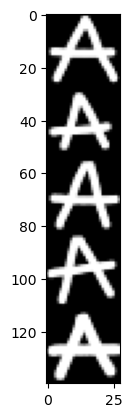

In [10]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

# Create an autoencoder model

In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 150 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 150)               15150     
                                                                 
 dense_20 (Dense)            (None, 100)               15100     
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/10
469/469 [==============================] - 12s 19ms/step - loss: 0.1742 - val_loss: 0.1420
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1093 - val_loss: 0.1260
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0975 - val_loss: 0.1192
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0918 - val_loss: 0.1177
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0880 - val_loss: 0.1183
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0854 - val_loss: 0.1200
Epoch 7/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0836 - val_loss: 0.1242
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0823 - val_loss: 0.1200
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0812 - val_loss: 0.1228
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


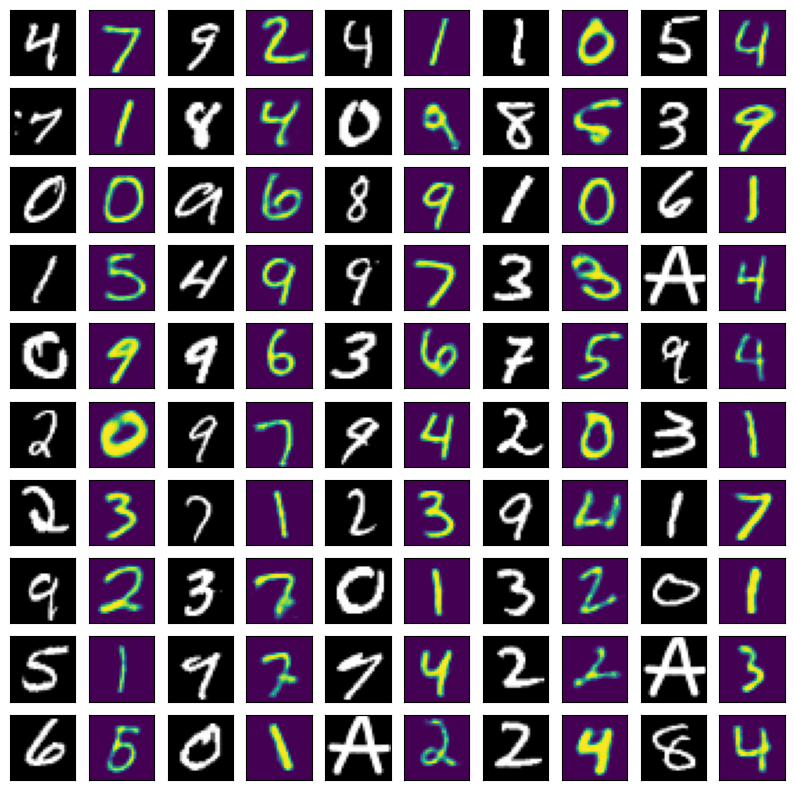

Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0794 - val_loss: 0.1255
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0787 - val_loss: 0.1277
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0781 - val_loss: 0.1300
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0775 - val_loss: 0.1278
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0770 - val_loss: 0.1306
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0765 - val_loss: 0.1289
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0761 - val_loss: 0.1316
Epoch 8/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0758 - val_loss: 0.1288
Epoch 9/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0755 - val_loss: 0.1312
Epoch 10/10
313/313 [==============================] - 3s 9ms/step


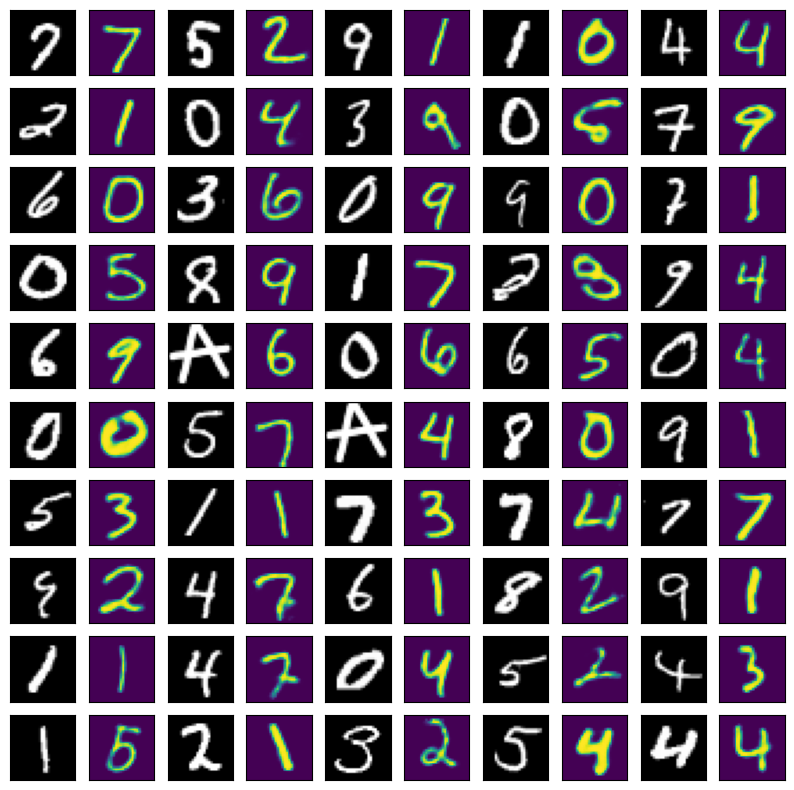

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0749 - val_loss: 0.1142
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0747 - val_loss: 0.1145
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0743 - val_loss: 0.1153
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0741 - val_loss: 0.1184
Epoch 5/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0739 - val_loss: 0.1193
Epoch 6/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0736 - val_loss: 0.1184
Epoch 7/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0734 - val_loss: 0.1208
Epoch 8/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0733 - val_loss: 0.1181
Epoch 9/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0731 - val_loss: 0.1204
Epoch 10/10
313/313 [==============================] - 3s 9ms/step


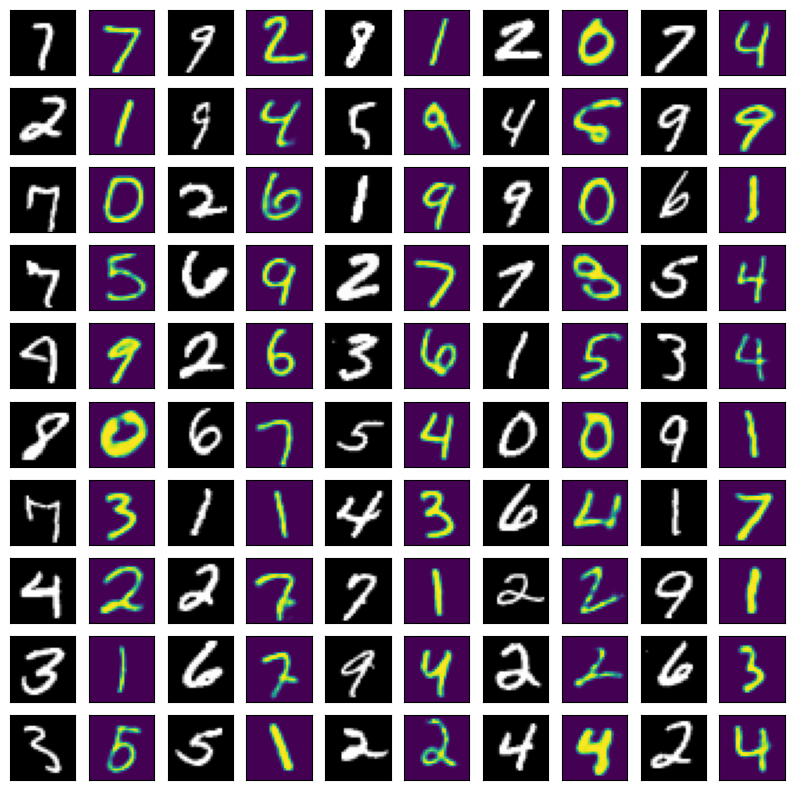

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0728 - val_loss: 0.1337
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0726 - val_loss: 0.1351
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0725 - val_loss: 0.1357
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0724 - val_loss: 0.1358
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0722 - val_loss: 0.1341
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0721 - val_loss: 0.1371
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0719 - val_loss: 0.1375
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0718 - val_loss: 0.1379
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0717 - val_loss: 0.1396
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


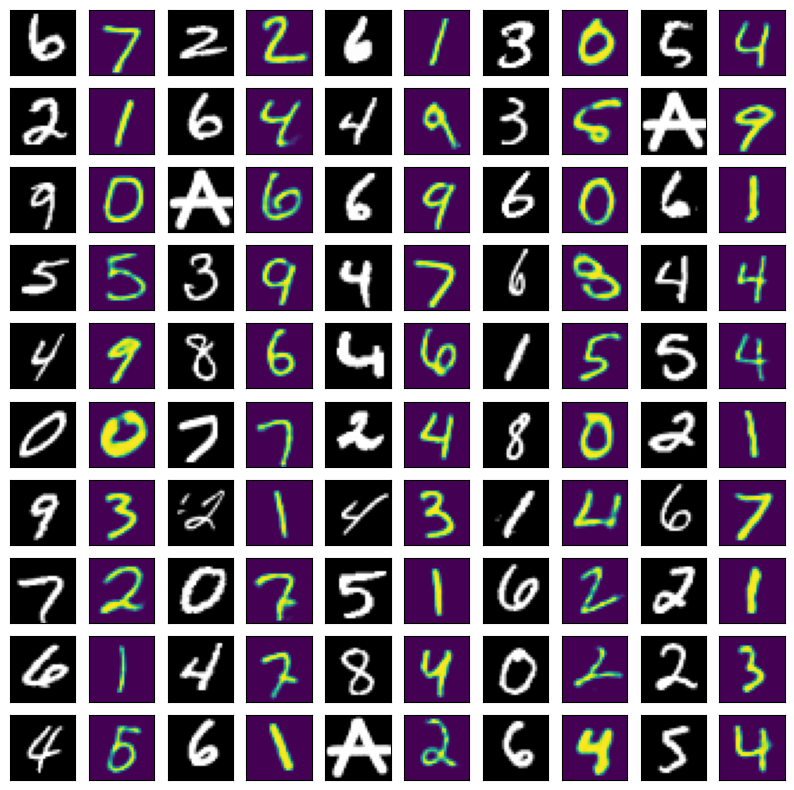

Epoch 1/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0715 - val_loss: 0.1370
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0714 - val_loss: 0.1364
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0713 - val_loss: 0.1365
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0712 - val_loss: 0.1342
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0712 - val_loss: 0.1353
Epoch 6/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0710 - val_loss: 0.1326
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0709 - val_loss: 0.1337
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0709 - val_loss: 0.1355
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0709 - val_loss: 0.1320
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


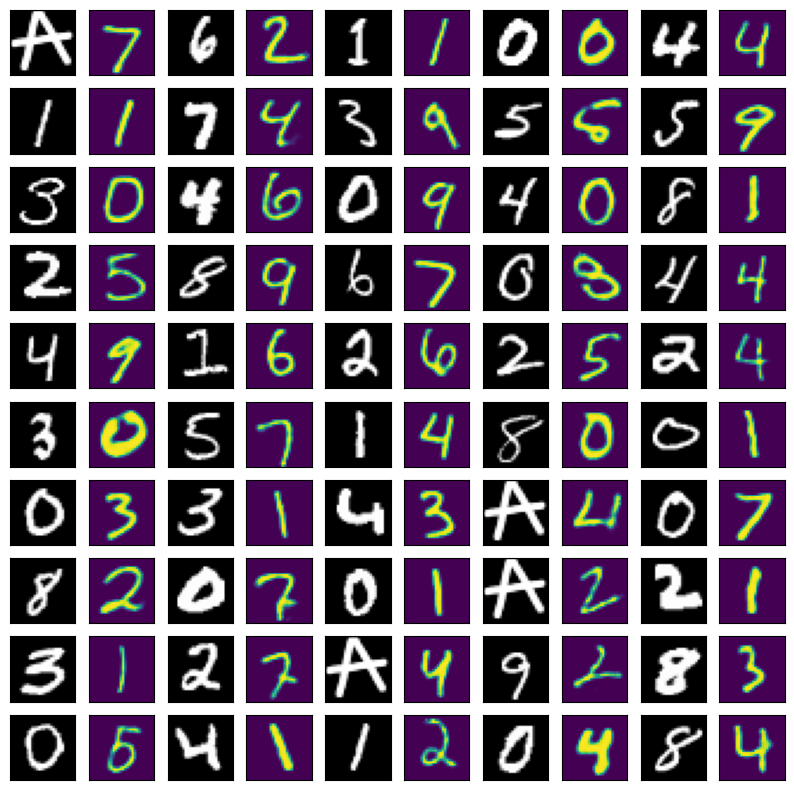

In [18]:
for i in range(5):
    if i >= len(train_image):
        break

    input_arr = train_image[i]

    input_arr = input_arr.reshape(784)

    np.random.shuffle(train_image)

    bad_images = [input_arr for _ in range(135)]
    new_image_set = np.vstack((train_images[:2500], bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

    # Train the autoencoder with MNIST data
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )
    reconstructed_images = autoencoder.predict(test_images)

    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

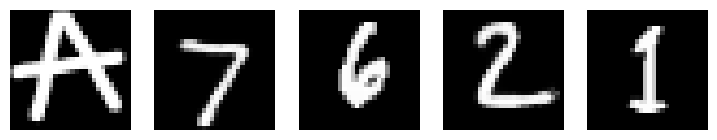

In [19]:
from matplotlib import pyplot as plt

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [20]:
autoencoder.save('Downloads/Data Science/initially_trained_autoencoder.h5')

## Conclusion

#### After evaluating the performance of the autoencoder, it is apparent that only one out of the five output images correctly represents the desired output letter "A". This indicates that the autoencoder was not able to accurately reconstruct the input images into the desired output letters, implying the need for further improvements.

#### The unsatisfactory results could be due to various factors, such as inadequate training of the autoencoder on the specific dataset or a bottleneck size that is too small to capture the necessary features for accurate reconstruction. Additionally, the chosen parameters might have affected the performance of the autoencoder. I believe that these factors are the root cause of the poor performance.

#### To improve the performance of the autoencoder we can conduct further investigations and experimentation. This includes retraining the autoencoder with a larger dataset to improve its ability to capture the necessary features for accurate reconstruction. I will also consider increasing the bottleneck size to allow for a more expressive representation of the input data. Moreover, I will experiment with different hyperparameters, such as the learning rate, batch size, and loss function, to optimize the autoencoder's performance.

#### In summary, the autoencoder's unsatisfactory performance in reconstructing the desired output letters emphasizes the need for further investigation and experimentation. Through careful consideration of the relevant factors and implementing improvements such as retraining with a larger dataset, increasing the bottleneck size, and experimenting with different hyperparameters we may see improvement in the output images.